In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('C:/Users/krishna/Downloads/unsupervised learning/Online Retail.csv',sep=',',encoding='ISO-8859-1')
df.head(10)                                                #or can use encoding='latin_1' or engine='python'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.isnull().values.sum()

136534

In [10]:
df.isnull().values.sum()*100/df.shape[0]

25.195005065426113

In [11]:
order_wise = df.dropna()

In [12]:
order_wise.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
order_wise.shape

(406829, 8)

# RFM(recency,frequency,monetary)

In [14]:
amount = pd.DataFrame(order_wise.Quantity*order_wise.UnitPrice, columns=['Amount'])

In [15]:
order_wise = pd.concat(objs=[order_wise, amount], axis=1, ignore_index=False)

In [16]:
Monetary = order_wise.groupby('CustomerID').Amount.sum()
Monetary.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [17]:
Monetary = Monetary.reset_index()

In [18]:
frequency = order_wise[['CustomerID','InvoiceNo']]

In [19]:
k = frequency.groupby('CustomerID').InvoiceNo.count()

In [20]:
k=pd.DataFrame(k)

In [21]:
k=k.reset_index()

In [22]:
k.columns = ['CustomerID','Frequency']

In [23]:
k.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [24]:
Recency = order_wise[['CustomerID','InvoiceDate']]

In [25]:
maximum = max(Recency.InvoiceDate)

In [26]:
maximum = maximum+pd.DateOffset(days=1)

In [27]:
Recency['diff'] = maximum-Recency.InvoiceDate

C:\Users\krishna\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
Recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-01-12 08:26:00,698 days 08:53:00
1,17850.0,2010-01-12 08:26:00,698 days 08:53:00
2,17850.0,2010-01-12 08:26:00,698 days 08:53:00
3,17850.0,2010-01-12 08:26:00,698 days 08:53:00
4,17850.0,2010-01-12 08:26:00,698 days 08:53:00


In [30]:
df = pd.DataFrame(Recency.groupby('CustomerID').diff.min())

In [31]:
df=df.reset_index()

In [32]:
df.columns = ['CustomerID','Recency']

In [33]:
df.head()

,CustomerID,Recency
0,12346.0,327 days 07:02:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00


In [34]:
RFM = k.merge(Monetary, on='CustomerID')
RFM = RFM.merge(df, on='CustomerID')

In [35]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
1,12347.0,182,4310.00,41 days 04:54:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00


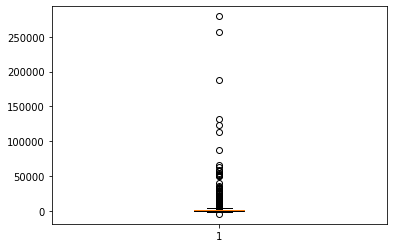

In [36]:
plt.boxplot(RFM.Amount)
plt.show()

In [37]:
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >=Q1-1.5*IQR) & (RFM.Amount <+ Q3+1.5*IQR)]

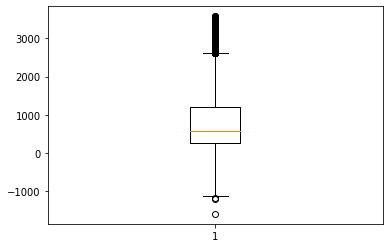

In [38]:
plt.boxplot(RFM.Amount)
plt.show()

In [39]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >=Q1-1.5*IQR) & (RFM.Frequency <+ Q3+1.5*IQR)]

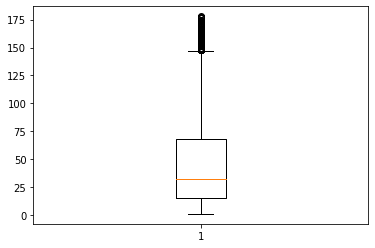

In [40]:
plt.boxplot(RFM.Frequency)
plt.show()

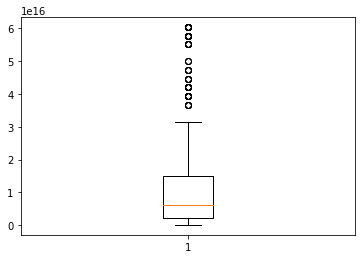

In [41]:
plt.boxplot(RFM.Recency)
plt.show()

In [42]:
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >=Q1-1.5*IQR) & (RFM.Recency <+ Q3+1.5*IQR)]

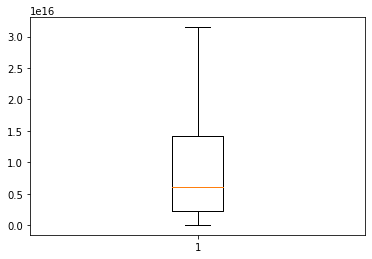

In [43]:
plt.boxplot(RFM.Recency)
plt.show()

In [51]:
RFM.head()

,CustomerID,Frequency,Amount,Recency
0,12346.0,2,0.00,327 days 07:02:00
2,12348.0,31,1797.24,77 days 04:06:00
3,12349.0,73,1757.55,20 days 07:28:00
4,12350.0,17,334.40,312 days 01:18:00
5,12352.0,95,1545.41,74 days 02:21:00


# Standardise all parameters

In [66]:
RFM_norm1 = RFM.drop('CustomerID', axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days

from sklearn.preprocessing import StandardScaler
Standard_Scaler = StandardScaler()
Standard_Scaler.fit_transform(RFM_norm1)

array([[-1.08205673, -1.0557058 ,  2.33176413],
       [-0.38875763,  1.36528882, -0.28560604],
       [ 0.61533072,  1.31182391, -0.88236644],
       ...,
       [-0.9625224 , -0.9468362 , -1.03940866],
       [-0.81908121, -0.81781456, -0.10762487],
       [ 0.54361012,  1.41922521, -1.08128658]])

In [67]:
RFM_norm1.head()

,Frequency,Amount,Recency
0,2,0.00,327
2,31,1797.24,77
3,73,1757.55,20
4,17,334.40,312
5,95,1545.41,74


In [48]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [54]:
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10)
    clusters.fit(RFM_norm1)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append( clusters.inertia_)
clusters_df = pd.DataFrame( {'num_clusters':cluster_range, 'cluster_errors':cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.032067e+09
1,2,5.998337e+08
2,3,3.031300e+08
3,4,1.896884e+08
4,5,1.359227e+08
5,6,1.093802e+08
6,7,9.036247e+07
7,8,7.729568e+07
8,9,6.834342e+07
9,10,5.994466e+07


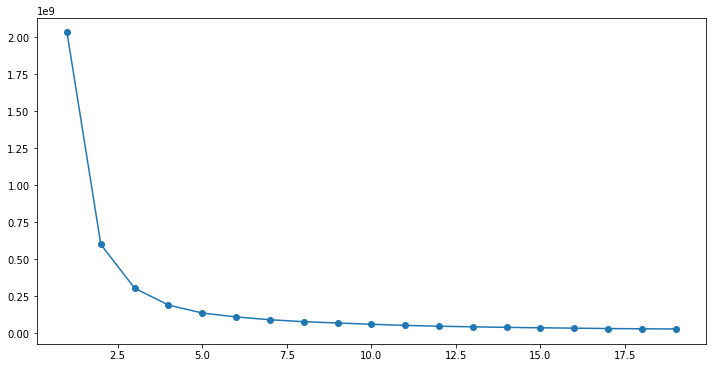

In [55]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

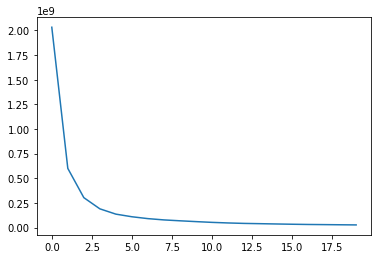

In [58]:
#sum of squared dist
ssd=[]
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)                       #another method

In [65]:
model_clus5 = KMeans(n_clusters = 4, max_iter=50)
model_clus5.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
# analysis of clusters formed

RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID','Frequency','Amount','Recency','ClusterID']

RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(['ClusterID']).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(['ClusterID']).Recency.mean())

In [70]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ['ClusterID','Amount_mean','Frequency_mean','Recency_mean']
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,802.895390,55.847591,81.604720
1,1,260.316925,23.322350,138.497529
2,2,2717.787580,114.859848,49.041667
3,3,1606.646304,80.363813,56.289883


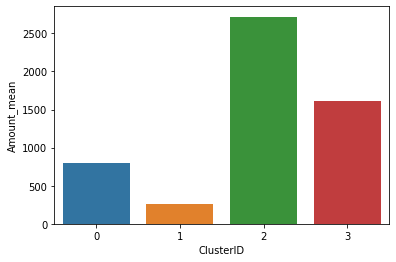

In [71]:
sns.barplot(x=df.ClusterID, y=df.Amount_mean)

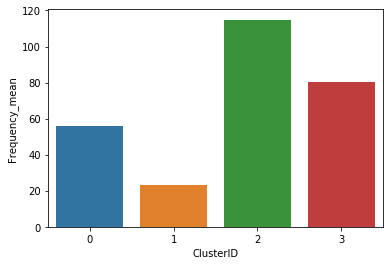

In [72]:
sns.barplot(x=df.ClusterID, y=df.Frequency_mean)

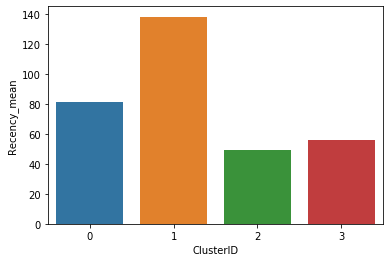

In [73]:
sns.barplot(x=df.ClusterID, y=df.Recency_mean)

# Heirarchical clustering

In [74]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

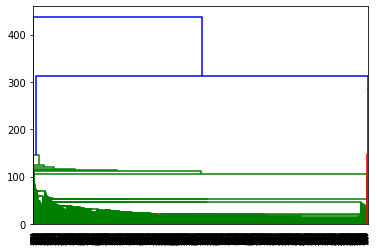

In [76]:
mergings = linkage(RFM_norm1, method = 'single', metric='euclidean')
dendrogram(mergings)
plt.show()

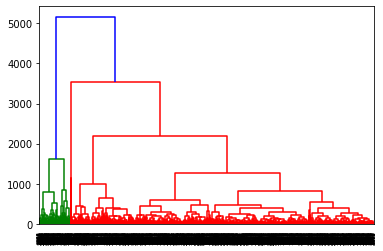

In [77]:
mergings = linkage(RFM_norm1, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()